## Introduction to Portfolio Analysis
---

The return on a portfolio of asset is a weighted average of the return on the individual assets. 
$$
 R_P = \sum_{n=1}^N w_nR_n.
$$
+ $R_P$: the return on the portfolio
+ $R_n$: the return on the $n$-th asset
+ $w_n$: the fraction of the funds invested in the $n$-th asset

The <font color=red>expected return</font> is defined as
\begin{align*}
 \mu_P &= \mathrm{E}(R_P) = \mathrm{E}\left(\sum_{n=1}^N w_nR_n\right) \\
  &= \sum_{n=1}^N w_n\mathrm{E}(R_n) = \sum_{n=1}^N w_n\mu_n.
\end{align*}

The <font color=red>variance</font> is defined as
\begin{align*}
 \sigma_P^2 &= \mathrm{E}[(R_P-\mu_P)^2]
  =\mathrm{E}\left[\left\{\sum_{n=1}^N w_n(R_n-\mu_n)\right\}^2\right] \\
  &=\sum_{n=1}^N w_n^2\mathrm{E}[(R_n-\mu_n)^2]
  +\sum_{n=1}^N\sum_{m\ne n}^N w_nw_m\mathrm{E}[(R_n-\mu_n)(R_m-\mu_m)] \\
  &= \sum_{n=1}^N w_n^2\sigma_n^2 + \sum_{n=1}^N\sum_{m\ne n}^N w_nw_m\sigma_{nm}.
\end{align*}


## Example: Portfolio of Two Assets
---

The expected return on a portfolio of two assets is

$$
 \mu_P = w_1\mu_1 + w_2\mu_2,
$$

and the variance is

\begin{align*}
 \sigma_P^2 
 &= w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_{12} \\
 &= w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\rho_{12}\sigma_1\sigma_2,
\end{align*}

where $\sigma_{12}=\rho_{12}\sigma_1\sigma_2$ and $\rho_{12}$ is the correlation coefficient between $R_1$ and $R_2$. The correlation coefficient affects the variance of portfolio returns.

The following cell computes expected returns and variances of portfolios with

$$
\mu_1 = 1.0,\ \mu_2 = 8.0,\ \sigma_1 = 1.0,\ \sigma_2 = 3.0,\ \rho_{12}\in\{0.8, 0.0, -0.8, -1.0\},
$$

and store them in `V_Return` and `V_Risk` respectively.

`zeros` is a NumPy function to create an array whose elemets are all equal to zero.

*Cf.* `ones` creates an array whose elements are all equal to one while `empty` creates an array whose elements are filled with unspecified numbers.


`enumerate` returns two values:

+ the second one is an element in an array/list/tuple
+ the first one is the corresponding index of each element


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
Mu = np.array([1.0, 8.0])
Sigma = np.array([1.0, 3.0])
V_Rho = np.array([0.8, 0.0, -0.8, -1.0])
V_Weight = np.linspace(0.0, 1.0, 101)
V_Return = np.zeros((V_Rho.size, V_Weight.size))
V_Risk = np.zeros((V_Rho.size, V_Weight.size))
for idx1, Rho in enumerate(V_Rho):
    for idx2, W in enumerate(V_Weight):
        V_Return[idx1, idx2] = W * Mu[0] + (1.0 - W) * Mu[1]
        V_Risk[idx1, idx2] = (W * Sigma[0])**2 + ((1.0 - W) * Sigma[1])**2 \
                             + 2.0 * Rho * Sigma[0] * Sigma[1] * W * (1.0 - W)

The following cell draws a figure demonstrating a trade-off relationship between the expected return and the variance. Following the convention, we take the square root of the variance (standard deviation) on the horizontal axis and the expected return on the vertical axis.

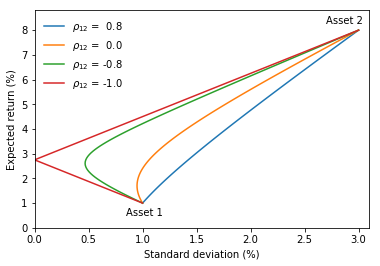

In [2]:
fig1 = plt.figure(num=1, facecolor='w')
for idx1, Rho in enumerate(V_Rho):
    plt.plot(np.sqrt(V_Risk[idx1, :]), V_Return[idx1, :], label='$\\rho_{{12}}$ = {:4.1f}'.format(Rho))
plt.xlim(0.0, 3.1)
plt.ylim(0.0, 8.8)
plt.legend(loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.text(0.85, 0.5, 'Asset 1')
plt.text(2.7, 8.25, 'Asset 2')
plt.show()

Suppose the investor's utility function is given by

$$
 U = \mu_P - \gamma\sigma_P^2,
$$

where $\gamma\geqq 0$ is the degree of risk averse. $U$ is a function of $w_1,\dots,w_n$.

The following cell plots utility functions with different degrees of risk averse ($\gamma=0.0, 1.0, 5.0$). To make comparison easy, the maximul point of each utility function is set equal to zero. In this example, we set $\rho_{12}=0.0$.

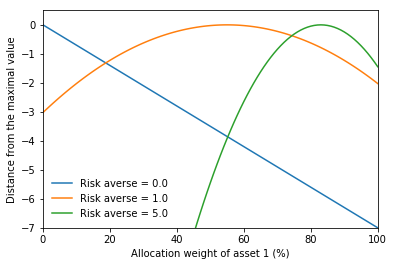

In [3]:
fig2 = plt.figure(num=2, facecolor='w')
V_RiskAverse = np.array([0.0, 1.0, 5.0])
for RiskAverse in V_RiskAverse:
    Utility = V_Return[1, :] - RiskAverse * V_Risk[1, :]
    Utility = Utility - np.max(Utility)
    plt.plot(100.0 * V_Weight, Utility, label='Risk averse = {:3.1f}'.format(RiskAverse))
plt.xlim(0.0, 100.0)
plt.ylim(-7.0, 0.5)
plt.xlabel('Allocation weight of asset 1 (%)')
plt.ylabel('Distance from the maximal value')
plt.legend(loc='best', frameon=False)
plt.show()